# To Eat or Not to Eat
## Mushroom Classification 
### Edible vs. Poisonous 

## Importing Libraries

In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder


## Uploading Dataset

In [226]:
#import data into DataFrame
dataset = pd.read_csv("mushrooms.csv")
dataset.head(5) 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Exploring the Data

In [227]:
#for better understanding of data. I replace the features with actual words. 
# Column Legends
classes = {'p': 'poisonous', 'e': 'edible'}
cap_shape = {'x': 'convex', 'b': 'bell', 's': 'sunken', 'f': 'flat', 'k': 'knobbed', 'c': 'conical'}
cap_surface = {'s': 'smooth', 'y': 'scaly', 'f': 'fibrous', 'g': 'grooves'}
cap_color = {'n': 'brown', 'y': 'yellow', 'w': 'white', 'g': 'gray', 'e': 'red', 'p': 'pink', 'b': 'buff', 'u': 'purple', 'c': 'cinnamon', 'r': 'green'}
bruises = {'t': 'yes', 'f': 'no'}
odor = {'p': 'pungent', 'a': 'almond', 'l': 'anise', 'n': 'none', 'f': 'foul', 'c': 'creosote', 'y': 'fishy', 's': 'spicy', 'm': 'musty'}
gill_attachment = {'f': 'free', 'a': 'attached', 'd': 'descending', 'n': 'notched'}
gill_spacing = {'c': 'close', 'w': 'crowded', 'd': 'distant'}
gill_size = {'n': 'narrow', 'b': 'broad'}
gill_color = {'k': 'black', 'n': 'brown', 'g': 'gray', 'p': 'pink', 'w': 'white', 'h': 'chocolate', 'u': 'purple', 'e': 'red', 'b': 'buff', 'r': 'green', 'y': 'yellow', 'o': 'orange'}
stalk_shape = {'e': 'enlarging', 't': 'tapering'}
stalk_root = {'e': 'equal', 'c': 'club', 'b': 'bulbous', 'r': 'rooted', '?': 'missing', 'e': 'equal', 'z': 'rhhizomorphs'}
stalk_surface_above_ring = {'s': 'smooth', 'f': 'fibrous', 'k': 'silky', 'y': 'scaly'}
stalk_surface_below_ring = {'s': 'smooth', 'f': 'fibrous', 'y': 'scaly', 'k': 'silky'}
stalk_color_above_ring = {'w': 'white', 'g': 'gray', 'p': 'pink', 'n': 'brown', 'b': 'buff', 'e': 'red', 'o': 'orange', 'c': 'cinnamon', 'y': 'yellow'}
stalk_color_below_ring = {'w': 'white', 'p': 'pink', 'g': 'gray', 'b': 'buff', 'n': 'brown', 'e': 'red', 'y': 'yellow', 'o': 'orange', 'c': 'cinnamon'}
veil_type = {'p': 'partial', 'u': 'universal'}
veil_color = {'w': 'white', 'n': 'brown', 'o': 'orange', 'y': 'yellow'}
ring_number = {'o': 'one', 't': 'two', 'n': 'none'}
ring_type = {'p': 'pendant', 'e': 'evanescent', 'l': 'large', 'f': 'flaring', 'n': 'none', 'c': 'cobwebby', 's': 'sheathing', 'z': 'zone'}
spore_print_color = {'k': 'black', 'n': 'brown', 'u': 'purple', 'h': 'chocolate', 'w': 'white', 'r': 'green', 'o': 'orange', 'y': 'yellow', 'b': 'buff'}
population = {'s': 'scattered', 'n': 'numerous', 'a': 'abundant', 'v': 'several', 'y': 'solitary', 'c': 'clustered'}
habitat = {'u': 'urban', 'g': 'grasses', 'm': 'meadows', 'd': 'woods', 'p': 'paths', 'w': 'waste', 'l': 'leaves'}

# New Dataset
name= dataset.copy()
name['class'] = name['class'].replace(classes)
name['cap-shape'] = name['cap-shape'].replace(cap_shape)
name['cap-surface'] = name['cap-surface'].replace(cap_surface)
name['cap-color'] = name['cap-color'].replace(cap_color)
name['bruises'] = name['bruises'].replace(bruises)
name['odor'] = name['odor'].replace(odor)
name['gill-attachment'] = name['gill-attachment'].replace(gill_attachment)
name['gill-spacing'] = name['gill-spacing'].replace(gill_spacing)
name['gill-size'] = name['gill-size'].replace(gill_size)
name['gill-color'] = name['gill-color'].replace(gill_color)
name['stalk-shape'] = name['stalk-shape'].replace(stalk_shape)
name['stalk-root'] = name['stalk-root'].replace(stalk_root)
name['stalk-surface-above-ring'] = name['stalk-surface-above-ring'].replace(stalk_surface_above_ring)
name['stalk-surface-below-ring'] = name['stalk-surface-below-ring'].replace(stalk_surface_below_ring)
name['stalk-color-above-ring'] = name['stalk-color-above-ring'].replace(stalk_color_above_ring)
name['stalk-color-below-ring'] = name['stalk-color-below-ring'].replace(stalk_color_below_ring)
name['veil-type'] = name['veil-type'].replace(veil_type)
name['veil-color'] = name['veil-color'].replace(veil_color)
name['ring-number'] = name['ring-number'].replace(ring_number)
name['ring-type'] = name['ring-type'].replace(ring_type)
name['spore-print-color'] = name['spore-print-color'].replace(spore_print_color)
name['population'] = name['population'].replace(population)
name['habitat'] = name['habitat'].replace(habitat)

name.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [228]:
new_dataset = pd.DataFrame(name)
new_dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


In [229]:
#In the dataset there are 22 features and 8124 different samples.

dataset.shape

(8124, 23)

In [230]:
# exploring attributtes, non-null values, and their type.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [231]:
#'class' column is the target attribute
#it has 2 catagories edible and poisonous('p','e')
#check distribution of the target variable.

dataset['class'].value_counts()/len(dataset)

e    0.517971
p    0.482029
Name: class, dtype: float64

In [232]:
# checking for missing values
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [233]:
#checking for dulicate 

dataset[dataset.duplicated()].shape[0]

0

In [235]:
#veil-type have only one class so we can drop the whole feature  
dataset.drop(columns=['veil-type'])
    

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


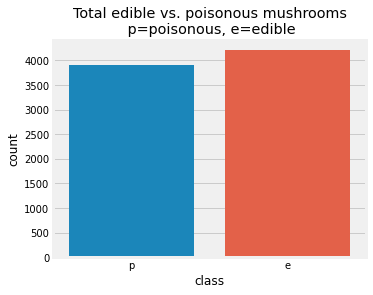

In [236]:
plt.figure(figsize=(5,4))
sns.countplot(dataset['class'])
plt.title("Total edible vs. poisonous mushrooms\n p=poisonous, e=edible")
plt.show()

In [210]:
dataset['class'].value_counts()


0    4208
1    3916
Name: class, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

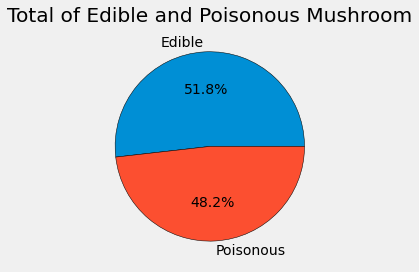

In [211]:
plt.style.use('fivethirtyeight')
slices = [4208,3916] #edible, poisonous
labels = ['Edible','Poisonous',]
colors =['orange','blue']
plt.pie(slices, labels=labels,autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.title('Total of Edible and Poisonous Mushroom')
plt.tight_layout()
plt.show

In [239]:
cap_color = pd.crosstab(index=new_dataset['class'], columns=new_dataset['cap-color'])
cap_color_tol = pd.DataFrame(cap_color)
cap_color_tol

cap-color,brown,buff,cinnamon,gray,green,pink,purple,red,white,yellow
class,,,,,,,,,,
edible,1264,48,32,1032,16,56,16,624,720,400
poisonous,1020,120,12,808,0,88,0,876,320,672


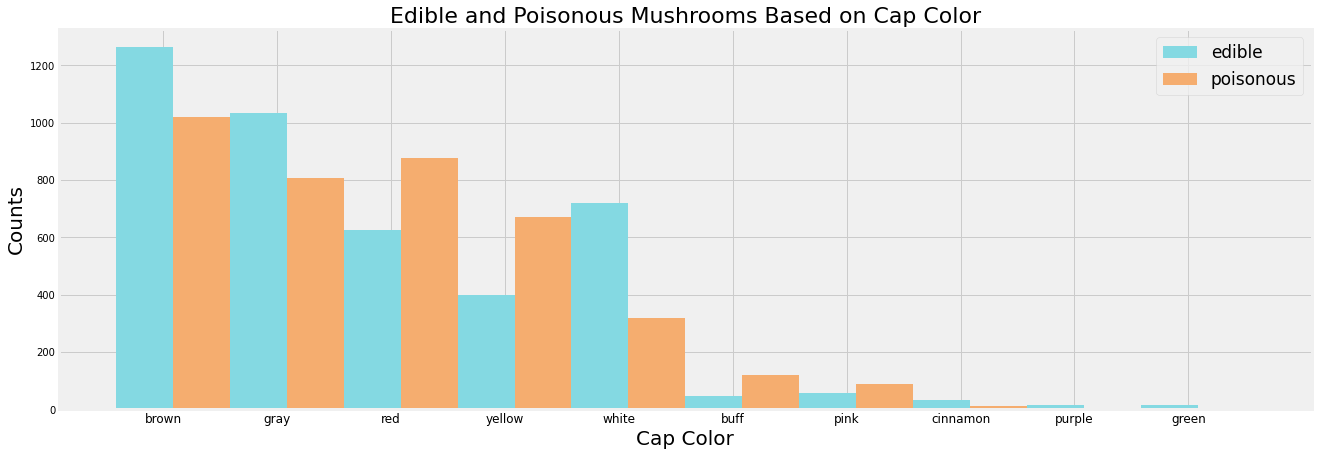

[1264, 1032, 624, 400, 720, 48, 56, 32, 16, 16]
[1020, 808, 876, 672, 320, 120, 88, 12, 0, 0]


In [252]:
poisonous_cc = [] #Poisonous color cap list
edible_cc = []    #Edible color cap list
for capColor in cap_color_labels:
    size = len(dataset[dataset['cap-color'] == capColor].index)
    edibles = len(dataset[(dataset['cap-color'] == capColor) & (dataset['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        
width = 0.50
fig, ax = plt.subplots(figsize=(20,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#84D9E2')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#F5AD6F')

#Add text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Counts',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22)
ax.set_xticks(ind + width / 3) 
ax.set_xticklabels(('Brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)

plt.show()
print(edible_cc)
print(poisonous_cc)


woods      3148
grasses    2148
paths      1144
leaves      832
urban       368
meadows     292
waste       192
Name: habitat, dtype: int64


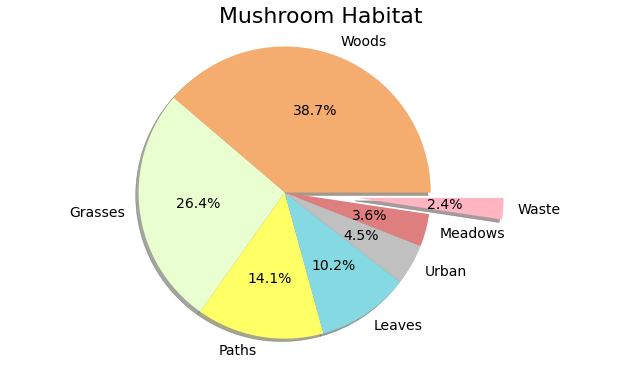

In [253]:
habit = new_dataset['habitat'].value_counts()
hab_size = habit.values.tolist() #give numerical values
hab_types = habit.axes[0].tolist() 
print(habit)

hab_labels = 'Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'
colors = ['#F5AD6F','#EAFFD0','#FFFF66','#84D9E2','#C0C0C0','#DE7E7E', '#FFB6C1']
explode = (0, 0, 0, 0, 0, 0,0.5)  # explode 1st slice
fig = plt.figure(figsize=(10,6))
# Plot
plt.title('Mushroom Habitat', fontsize=22)
patches, texts, autotexts = plt.pie(hab_size, explode=explode, labels=hab_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=360)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

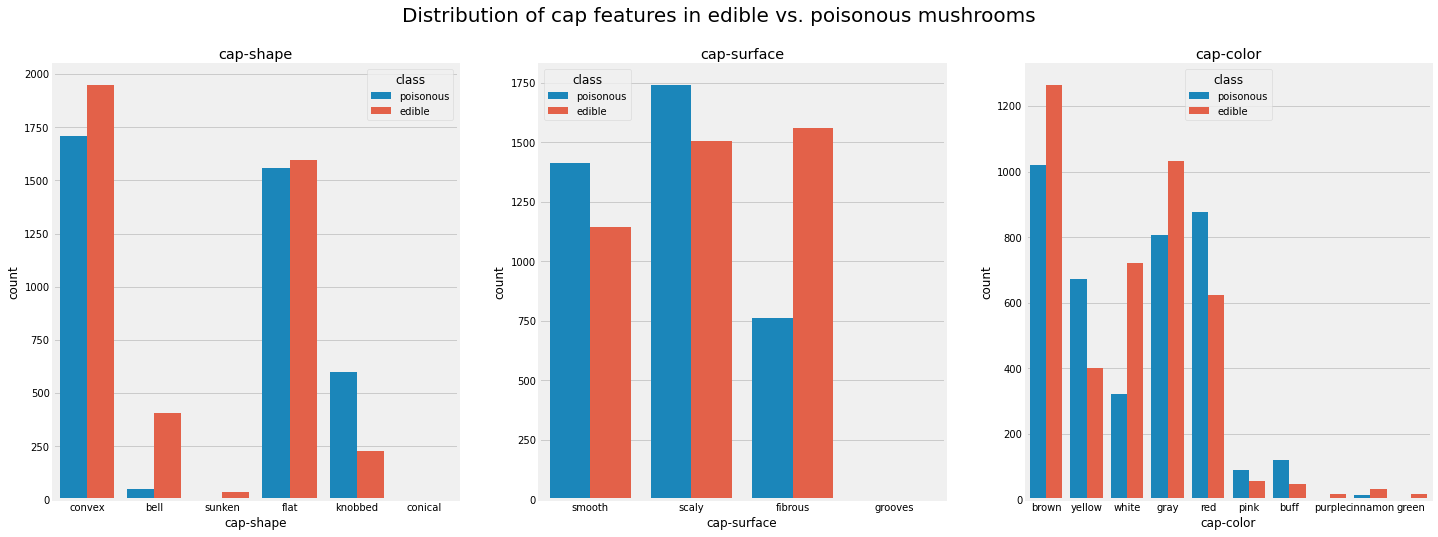

In [254]:
fig,ax=plt.subplots(1,3,figsize=(22,8))
sns.countplot('cap-shape', hue='class', data=new_dataset, ax=ax[0])
ax[0].set_title('cap-shape')

sns.countplot('cap-surface', hue='class', data=new_dataset, ax=ax[1])
ax[1].set_title('cap-surface')

sns.countplot('cap-color',hue='class', data=new_dataset, ax=ax[2])
ax[2].set_title('cap-color')


fig.suptitle("Distribution of cap features in edible vs. poisonous mushrooms", fontsize=20)

plt.show()

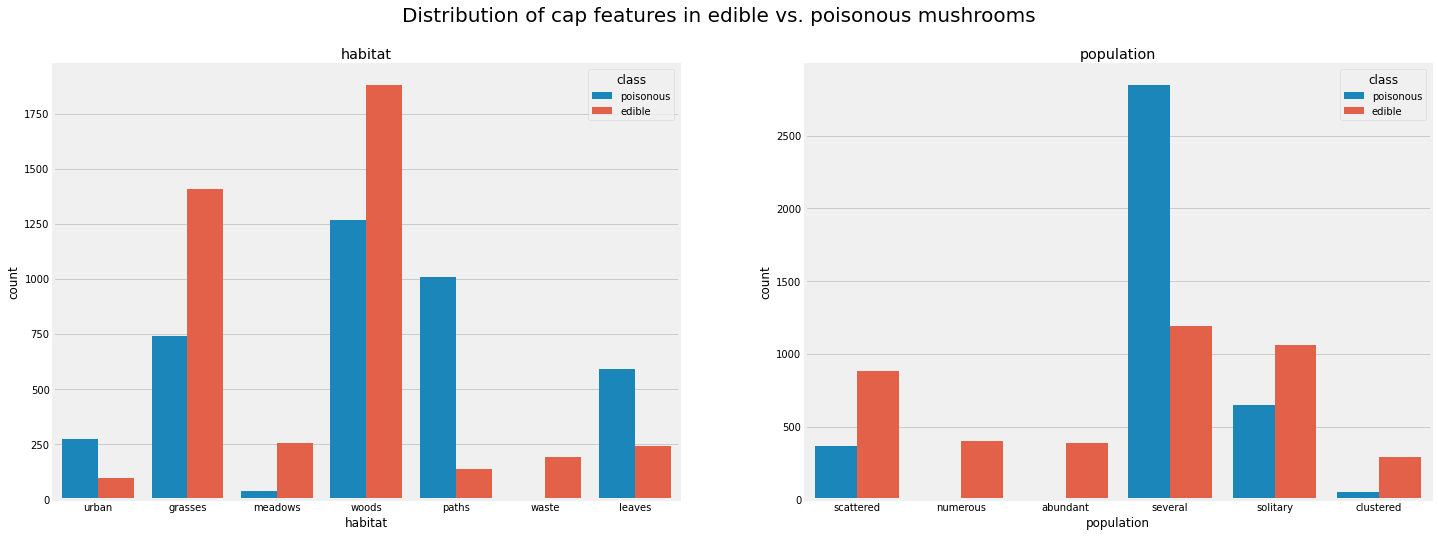

In [269]:
fig,ax=plt.subplots(1,2,figsize=(22,8))
sns.countplot('habitat', hue='class', data=new_dataset, ax=ax[0])
ax[0].set_title('habitat')

sns.countplot('population', hue='class', data=new_dataset, ax=ax[1])
ax[1].set_title('population')




fig.suptitle("Distribution of cap features in edible vs. poisonous mushrooms", fontsize=20)

plt.show()


In [187]:
#data is categorical
# need to convert categorical features into numerical values.

le = LabelEncoder()
dataset= dataset.apply(LabelEncoder().fit_transform)  
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [255]:
from sklearn.linear_model import LogisticRegression


In [ ]:
cols_names= ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
# load dataset
dataset=dataset



In [217]:
feature_cols = ['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
X = dataset[cols_names] # Features
y = dataset.class # Target variable

SyntaxError: invalid syntax (<ipython-input-217-3aa328cbb202>, line 7)

In [ ]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
